In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
%matplotlib inline

In [3]:
pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.


In [6]:
df = pd.read_excel(r'C:\Users\kate\Downloads\Dataset.xlsb', engine='pyxlsb')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          4712 non-null   object 
 1   Var1        4712 non-null   float64
 2   Var2        4712 non-null   float64
 3   Var3        4712 non-null   float64
 4   Var4        4712 non-null   float64
 5   Var5        4712 non-null   float64
 6   Var6        4712 non-null   float64
 7   Var7        4712 non-null   float64
 8   Var8        4712 non-null   float64
 9   Var9        4712 non-null   float64
 10  Var10       4712 non-null   float64
 11  Var11       4712 non-null   float64
 12  Var12       4712 non-null   float64
 13  Var13       4712 non-null   float64
 14  Age         4712 non-null   int64  
 15  County      4712 non-null   object 
 16  ZIP Code    4712 non-null   int64  
 17  Target_flg  4712 non-null   object 
dtypes: float64(13), int64(2), object(3)
memory usage: 662.8+ KB


In [8]:
#EDA

In [9]:
df.dtypes

ID             object
Var1          float64
Var2          float64
Var3          float64
Var4          float64
Var5          float64
Var6          float64
Var7          float64
Var8          float64
Var9          float64
Var10         float64
Var11         float64
Var12         float64
Var13         float64
Age             int64
County         object
ZIP Code        int64
Target_flg     object
dtype: object

In [10]:
df.isna().sum()

ID            0
Var1          0
Var2          0
Var3          0
Var4          0
Var5          0
Var6          0
Var7          0
Var8          0
Var9          0
Var10         0
Var11         0
Var12         0
Var13         0
Age           0
County        0
ZIP Code      0
Target_flg    0
dtype: int64

In [11]:
df['Target_flg'].value_counts()

Y    2533
N    2179
Name: Target_flg, dtype: int64

In [12]:
df['Target_flg'] = df['Target_flg'].map({'Y': 1, 'N': 0})
df['Target_flg'].value_counts()

1    2533
0    2179
Name: Target_flg, dtype: int64

In [13]:
clean_data = df.drop(['ID','County','ZIP Code'],axis=1)

clean_data

Var1           Var2      Var3      Var4      Var5      Var6  \
0      15932.19    6732.154506  0.000000  1.031774  0.435977  0.000000   
1      36130.00   24555.144750  0.000000  1.471382  1.000000  0.000000   
2      34816.21   16337.682580  0.000000  0.490552  0.230194  0.000000   
3      11951.59    4865.167981 -0.302664  0.362050  0.147381  0.000000   
4      15183.07   11935.877330 -0.168730  0.774283  0.608687 -0.084055   
...         ...            ...       ...       ...       ...       ...   
4707  246985.74  127293.780000  0.000000  0.409046  0.210818 -0.771760   
4708  247183.08  128226.406200 -0.255300  1.173763  0.608890  0.000000   
4709  247846.94   77886.160400 -0.215637  1.983185  0.623218  0.000000   
4710  248397.73  189323.510700 -0.045687  1.241678  0.946381  0.000000   
4711  250000.00  231451.612900  0.000000  1.080139  1.000000  0.000000   

          Var7      Var8      Var9     Var10     Var11     Var12     Var13  \
0     1.031774  0.435977  0.000000  1.031774  0.435977  1.031774  0.435977   
1     1.471382  1.000000  0.000000  1.281334  0.870837  1.064135  0.723222   
2     0.437241  0.205178  0.000000  0.429344  0.201472  0.429344  0.201472   
3     0.519191  0.211349  0.000000  0.477323  0.194305  0.368289  0.149921   
4     0.931445  0.732238  0.000000  1.016923  0.799434  0.921456  0.724385   
...        ...       ...       ...       ...       ...       ...       ...   
4707  0.246774  0.127185 -0.001382  1.081207  0.557242  1.082702  0.558013   
4708  1.576155  0.817631  0.000000  1.576015  0.817559  1.575875  0.817486   
4709  2.528403  0.794553  0.000000  0.936864  0.294411  0.273582  0.085973   
4710  1.301123  0.991688 -0.030929  1.268468  0.966799  1.308952  0.997656   
4711  1.080139  1.000000  0.000000  1.080139  1.000000  1.080139  1.000000   

      Age  Target_flg  
0      10           1  
1      10           1  
2       8           0  
3       6           0  
4       6           1  
...   ...         ...  
4707   43           1  
4708   43           1  
4709   43           0  
4710   43           1  
4711   43           1  

[4712 rows x 15 columns]

In [14]:
clean_data.describe()

Var1          Var2         Var3         Var4         Var5  \
count  4.712000e+03  4.712000e+03  4712.000000  4712.000000  4712.000000   
mean   3.049018e+05  1.931475e+05    -0.123159     1.106061     0.609488   
std    8.507660e+05  5.769929e+05     0.230058     1.024112     0.361521   
min    1.021230e+03  7.970845e+02    -0.999914     0.000007     0.000002   
25%    2.446559e+04  1.270121e+04    -0.140950     0.613361     0.262832   
50%    6.150288e+04  3.070986e+04     0.000000     0.998878     0.664479   
75%    1.900659e+05  1.062345e+05     0.000000     1.239502     1.000000   
max    9.762228e+06  9.211746e+06     0.000000    13.000000     1.000000   

              Var6         Var7         Var8         Var9        Var10  \
count  4712.000000  4712.000000  4712.000000  4712.000000  4712.000000   
mean     -0.100236     1.022851     0.601010    -0.114810     0.953768   
std       0.205897     0.627888     0.347181     0.217586     0.638757   
min      -1.000000     0.000000     0.000000    -1.000000     0.000000   
25%      -0.084469     0.667695     0.276135    -0.133063     0.612398   
50%       0.000000     1.000195     0.641961     0.000000     0.979068   
75%       0.000000     1.204848     0.975128     0.000000     1.112666   
max       0.000000     5.486604     1.000000     0.000000    10.850523   

             Var11        Var12        Var13          Age   Target_flg  
count  4712.000000  4712.000000  4712.000000  4712.000000  4712.000000  
mean      0.570767     0.945217     0.568427    34.305390     0.537564  
std       0.346622     0.602039     0.345062     8.891257     0.498640  
min       0.000000     0.000000     0.000000     5.000000     0.000000  
25%       0.248642     0.628022     0.249702    28.000000     0.000000  
50%       0.581665     0.977683     0.586286    34.000000     1.000000  
75%       0.937625     1.101804     0.924778    42.000000     1.000000  
max       1.000000     8.667899     1.000000    43.000000     1.000000

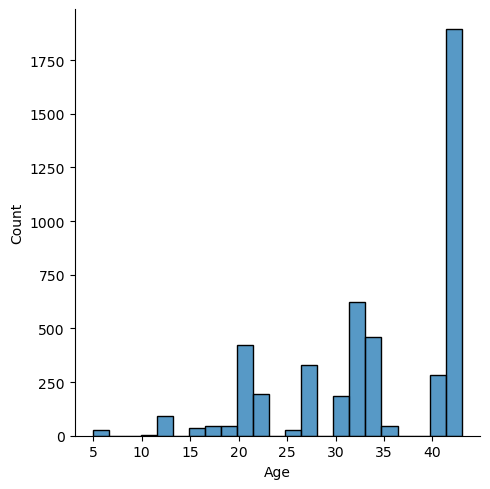

In [15]:
sns.displot(df.Age)

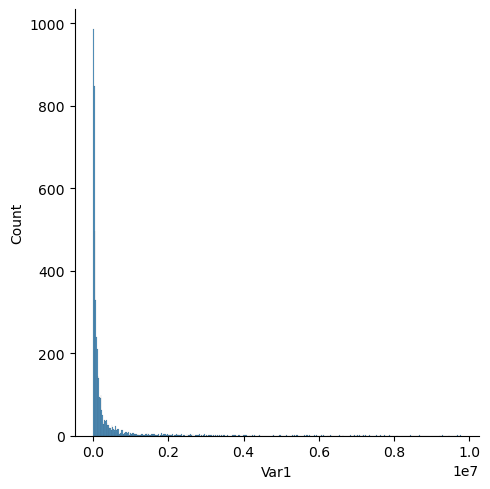

In [16]:
sns.displot(df.Var1)

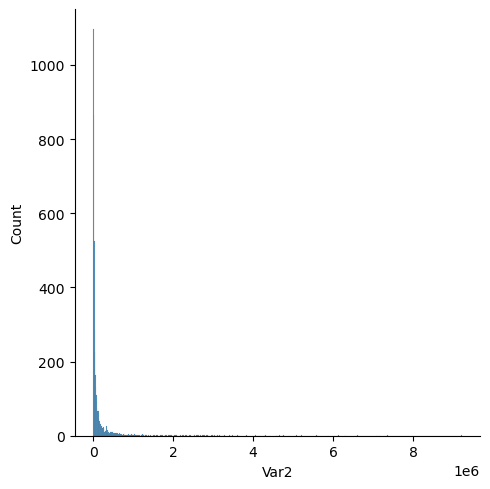

In [17]:
sns.displot(df.Var2)

<AxesSubplot:xlabel='Var3', ylabel='Count'>

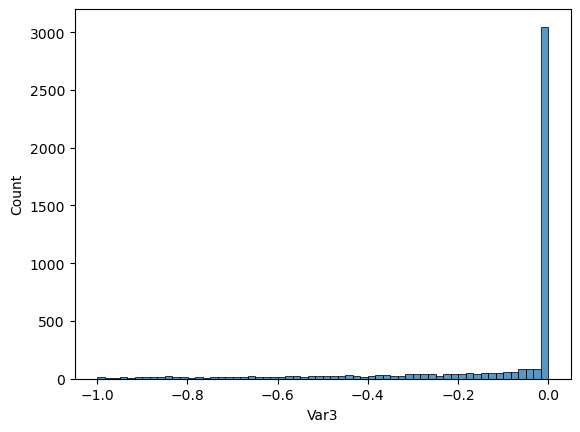

In [18]:
sns.histplot(df.Var3)

<AxesSubplot:xlabel='Var4', ylabel='Count'>

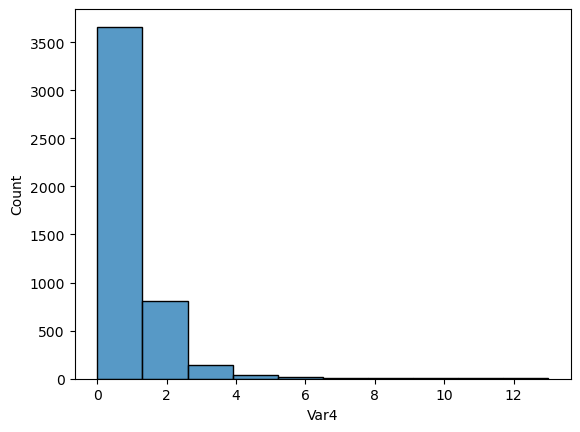

In [19]:
sns.histplot(df.Var4, bins=10)

<AxesSubplot:xlabel='Var5', ylabel='Count'>

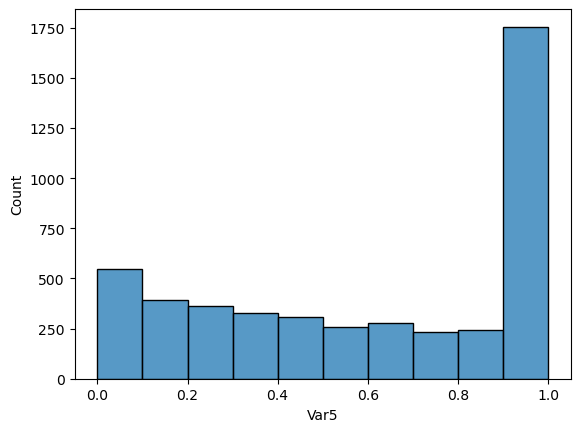

In [20]:
sns.histplot(df.Var5, bins=10)

<AxesSubplot:xlabel='Var6', ylabel='Count'>

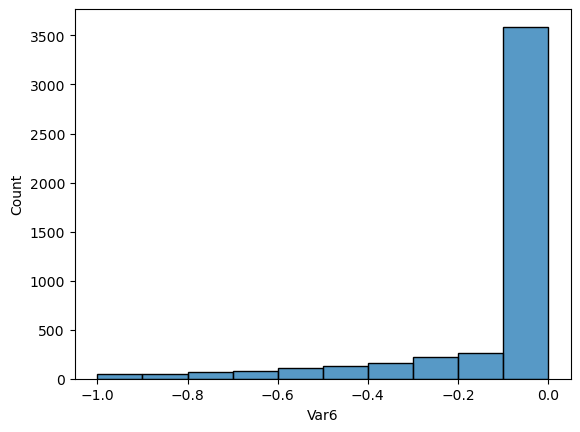

In [21]:
sns.histplot(df.Var6, bins=10)

<AxesSubplot:xlabel='Var7', ylabel='Count'>

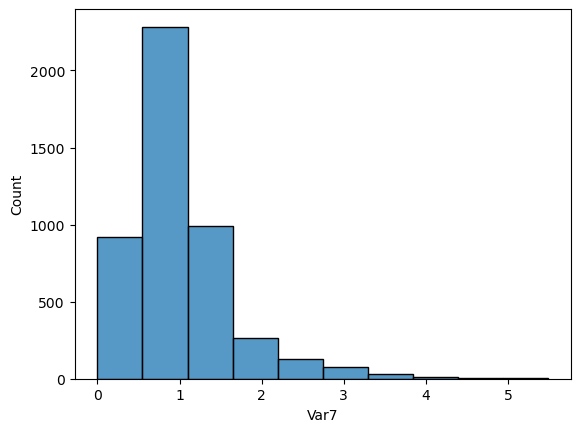

In [22]:
sns.histplot(df.Var7, bins=10)

<AxesSubplot:xlabel='Var8', ylabel='Count'>

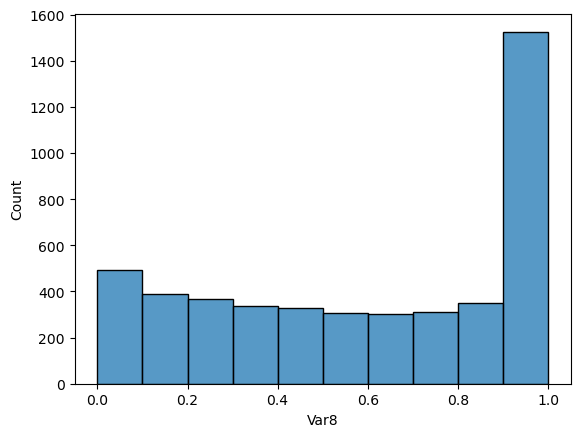

In [23]:
sns.histplot(df.Var8, bins=10)

<AxesSubplot:xlabel='Var9', ylabel='Count'>

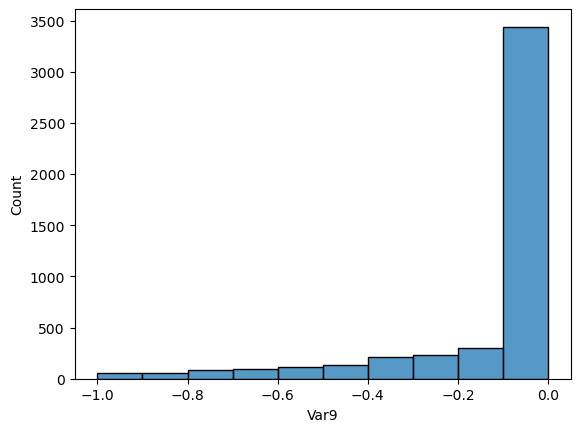

In [24]:
sns.histplot(df.Var9, bins=10)

<AxesSubplot:xlabel='Var10', ylabel='Count'>

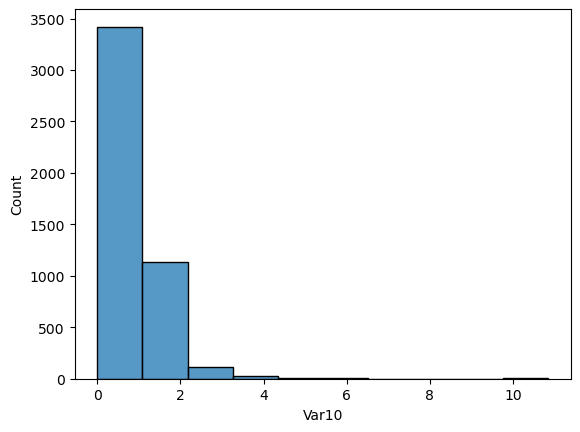

In [70]:
sns.histplot(df.Var10, bins=10)

<AxesSubplot:xlabel='Var11', ylabel='Count'>

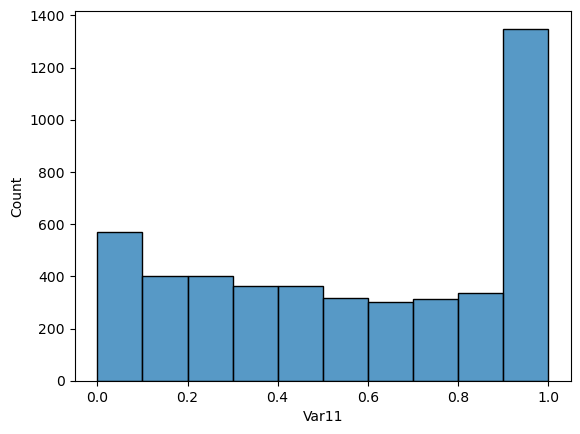

In [25]:
sns.histplot(df.Var11, bins=10)

<AxesSubplot:xlabel='Var12', ylabel='Count'>

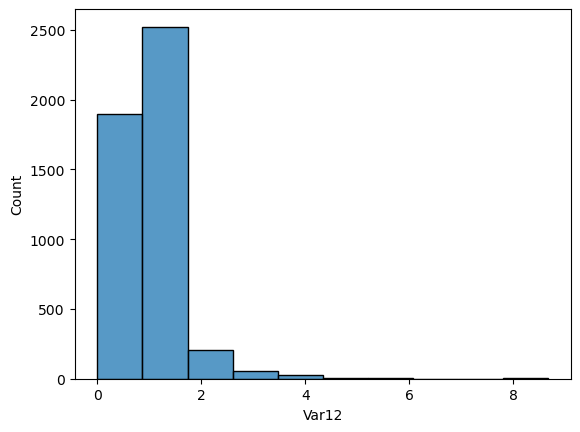

In [26]:
sns.histplot(df.Var12, bins=10)

<AxesSubplot:xlabel='Var13', ylabel='Count'>

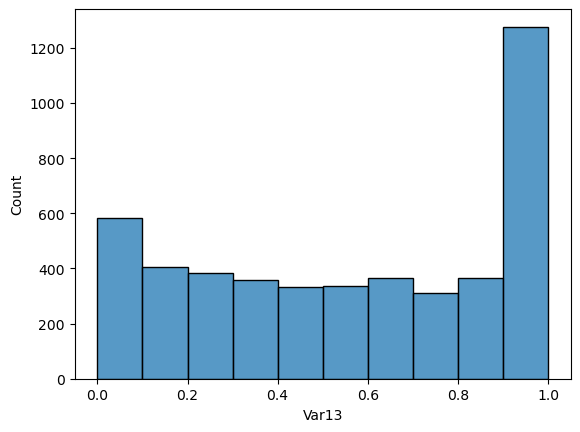

In [27]:
sns.histplot(df.Var13, bins=10)

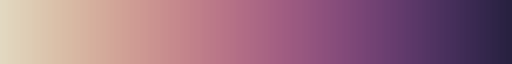

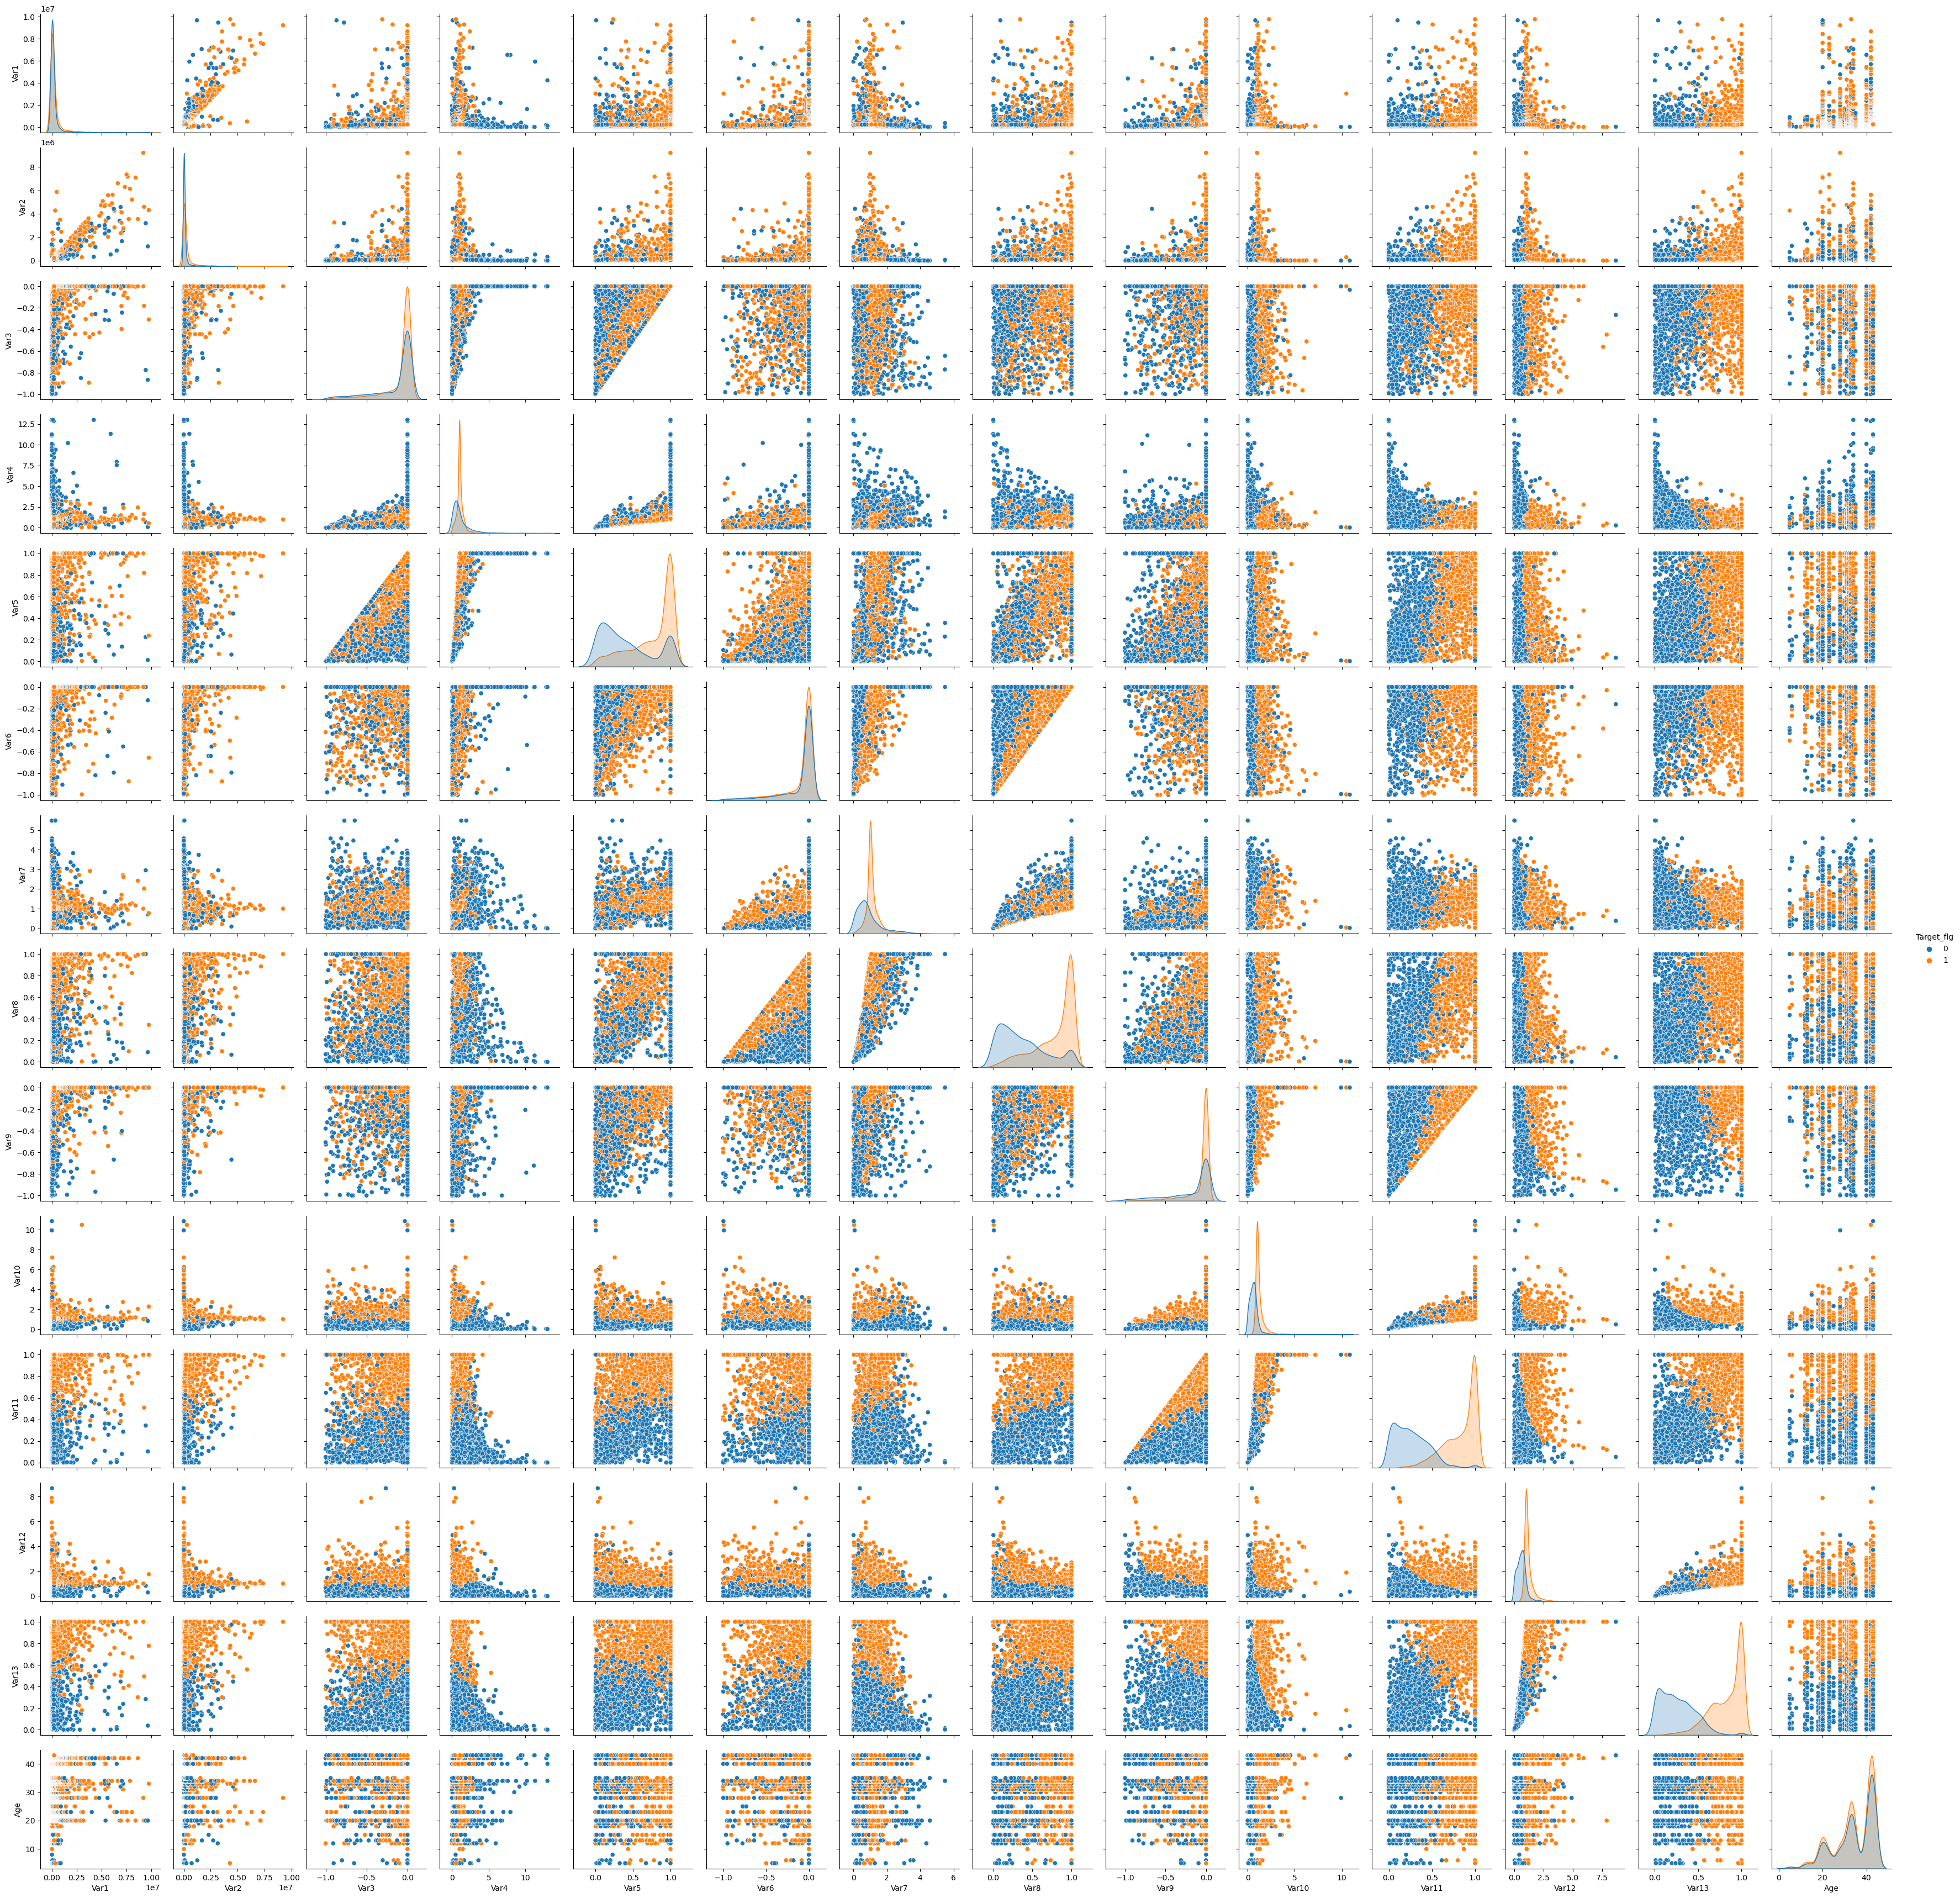

In [55]:
sns.pairplot(clean_data,hue='Target_flg')
sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)

#Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

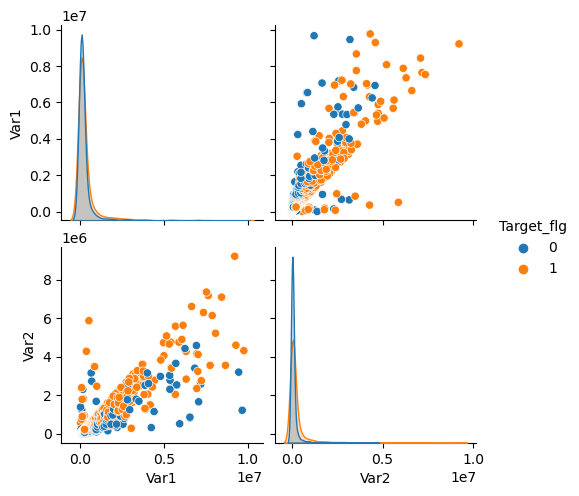

In [53]:
sns.pairplot(clean_data, vars=["Var1","Var2",],             
             hue='Target_flg')

In [56]:
#Logistic Regression
from sklearn.model_selection import train_test_split

In [57]:
X = df[['Var1', 'Var2', 'Var3','Var4', 'Var5','Var6','Var7','Var8','Var9','Var10','Var11','Var12','Var13']]
y = df['Target_flg']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
#Training and Predicting
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [61]:
#Predictions and Evaluations
predictions = logmodel.predict(X_test)

In [67]:
predictions

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [62]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.65      0.71       657
           1       0.73      0.85      0.79       757

    accuracy                           0.75      1414
   macro avg       0.76      0.75      0.75      1414
weighted avg       0.76      0.75      0.75      1414



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(y_test,predictions)

array([[424, 233],
       [115, 642]], dtype=int64)